In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

In [2]:
ipl = pd.read_csv('/content/ipl_data (2).csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
#Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [4]:
X = df.drop(['total'], axis =1)
y = df['total']

In [5]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [6]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

In [9]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 54.6037 - val_loss: 22.0989
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 22.5515 - val_loss: 21.9759
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 22.2182 - val_loss: 22.2556
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 22.3100 - val_loss: 22.0096
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.2106 - val_loss: 21.8501
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 22.0321 - val_loss: 22.0839
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 22.0976 - val_loss: 21.8060
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 22.2511 - val_loss: 21.9787
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.1759 - val_loss: 22.0066
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 22.1187 - val_loss: 21.8254
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.0941 - val_loss: 21.7514
Epoch 12/50
832/832 ━━━━━

<Axes: >

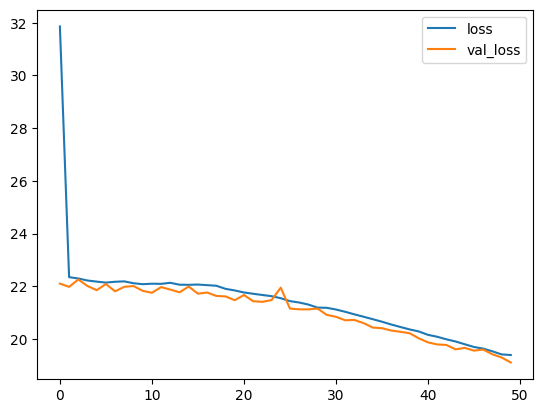

In [10]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [11]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


19.59702452408904

In [23]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np

# Example widgets with adjusted styles for wider descriptions
venue = widgets.Dropdown(
    options=df['venue'].unique().tolist(),
    description='Select Venue:',
    layout=widgets.Layout(width='400px'),
    style={'description_width': '150px'}  # Adjust label width
)
batting_team = widgets.Dropdown(
    options=df['bat_team'].unique().tolist(),
    description='Select Batting Team:',
    layout=widgets.Layout(width='400px'),
    style={'description_width': '150px'}
)
bowling_team = widgets.Dropdown(
    options=df['bowl_team'].unique().tolist(),
    description='Select Bowling Team:',
    layout=widgets.Layout(width='400px'),
    style={'description_width': '150px'}
)
striker = widgets.Dropdown(
    options=df['batsman'].unique().tolist(),
    description='Select Striker:',
    layout=widgets.Layout(width='400px'),
    style={'description_width': '150px'}
)
bowler = widgets.Dropdown(
    options=df['bowler'].unique().tolist(),
    description='Select Bowler:',
    layout=widgets.Layout(width='400px'),
    style={'description_width': '150px'}
)

predict_button = widgets.Button(
    description="Predict Score",
    layout=widgets.Layout(width='200px')
)

output = widgets.Output()

def predict_score(b):
    with output:
        clear_output()
        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])

        # Prepare input data
        input_data = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team, decoded_striker, decoded_bowler])
        input_data = input_data.reshape(1, -1)
        input_data = scaler.transform(input_data)

        # Predict and display score
        predicted_score = model.predict(input_data)
        predicted_score = int(predicted_score[0, 0])
        print(f"Predicted Score: {predicted_score}")


In [24]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', layout=Layout(width='400px'), options=('M Chinnaswamy Stadium', 'Punjab …

Dropdown(description='Select Batting Team:', layout=Layout(width='400px'), options=('Kolkata Knight Riders', '…

Dropdown(description='Select Bowling Team:', layout=Layout(width='400px'), options=('Royal Challengers Bangalo…

Dropdown(description='Select Striker:', layout=Layout(width='400px'), options=('SC Ganguly', 'BB McCullum', 'R…

Dropdown(description='Select Bowler:', layout=Layout(width='400px'), options=('P Kumar', 'Z Khan', 'AA Noffke'…

Button(description='Predict Score', layout=Layout(width='200px'), style=ButtonStyle())

Output()